In [57]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#to ignore warning messages
import warnings 
warnings.filterwarnings('ignore')

### Loading the csv files and briefly viewing them

In [22]:
# loading the sample file
sample = pd.read_csv('SampleSubmission.csv')
sample.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [23]:
# loading the test file
test = pd.read_csv('Test.csv')
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [24]:
# checking datatypes and shape
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


In [25]:
#loading the train file
train= pd.read_csv('Train.csv')
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [26]:
#checking it's datatype and shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [27]:
#loading the variable definitions file and viewing it
var_def= pd.read_csv('VariableDefinitions.csv')
var_def

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


### Cleaning the datasets

In [28]:
#checking for missing values
train.duplicated().sum()

0

In [29]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

#### cleaning the test dataset

In [30]:
# checking for duplicates
test.duplicated().sum()

0

In [31]:
#checking for missing data
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [32]:
# viewing data for outliers
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [33]:
# checking each column has no outlier value
for x in test.columns:
    print( 'THE VALUES IN ' + str.upper(x) + ' ARE:')
    print(test[x].value_counts())
    print('\n')

THE VALUES IN COUNTRY ARE:
Rwanda      3745
Tanzania    2839
Kenya       2601
Uganda       901
Name: country, dtype: int64


THE VALUES IN YEAR ARE:
2016    3745
2018    3502
2017    2839
Name: year, dtype: int64


THE VALUES IN UNIQUEID ARE:
uniqueid_8633     3
uniqueid_8535     3
uniqueid_8612     3
uniqueid_8592     3
uniqueid_8620     3
                 ..
uniqueid_10432    1
uniqueid_10433    1
uniqueid_10434    1
uniqueid_10435    1
uniqueid_3002     1
Name: uniqueid, Length: 7313, dtype: int64


THE VALUES IN LOCATION_TYPE ARE:
Rural    6189
Urban    3897
Name: location_type, dtype: int64


THE VALUES IN CELLPHONE_ACCESS ARE:
Yes    7559
No     2527
Name: cellphone_access, dtype: int64


THE VALUES IN HOUSEHOLD_SIZE ARE:
2     2272
3     1638
4     1492
1     1320
5     1282
6      877
7      580
8      321
9      147
10      86
12      28
11      25
13       6
15       5
16       3
20       2
14       1
18       1
Name: household_size, dtype: int64


THE VALUES IN AGE_OF_RESPON

### Exploratory Data Analysis

   - What is the distribution of individuals having a bank account across different countries?
    
   - Is there a correlation between demographic variables (location_type, cellphone_access, household_size, age_of_respondent, gender_of_respondent, relationship_with_head, marital_status, education_level, job_type) and having a bank account?
   
   - What is the percentage of individuals having other financial services like mobile money, insurance, etc. across different countries?
    - Are there any outliers or anomalies in the data? etc


### Visual exploration

#### Q1. What is the Distribution of Individuals Having a Bank Account Across Different Countries?

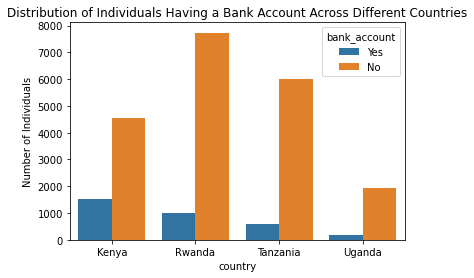

In [34]:
# What is the distribution of individuals having a bank account across different countries?
# created a countplot with country on x-axis and colour coded by bank_account
sns.countplot(data= train, x= 'country', hue='bank_account')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Individuals Having a Bank Account Across Different Countries');

- As seen above, kenya has the most individuals with a bank account and Rwanda has the most number of individuals wthout a bank account according to the data

#### Q2.
##### Is there a correlation between demographic variables (location_type, cellphone_access, household_size, age_of_respondent, gender_of_respondent, relationship_with_head, marital_status, education_level, job_type) and having a bank account?

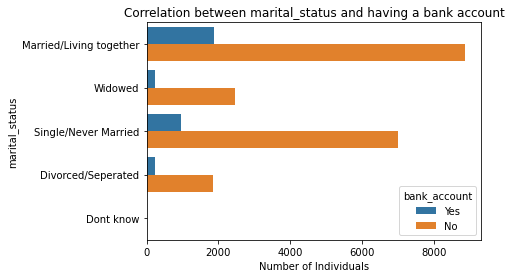

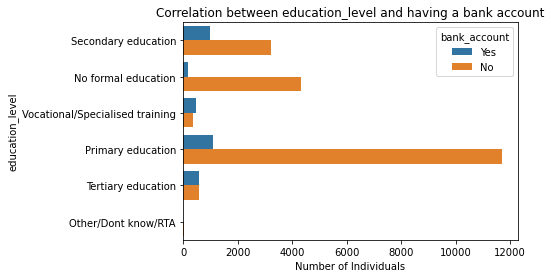

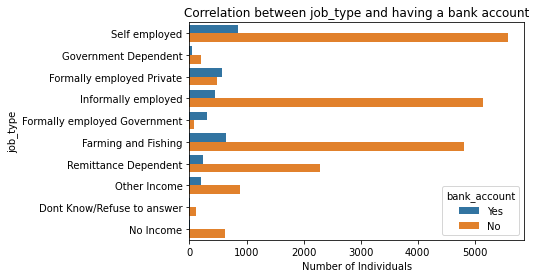

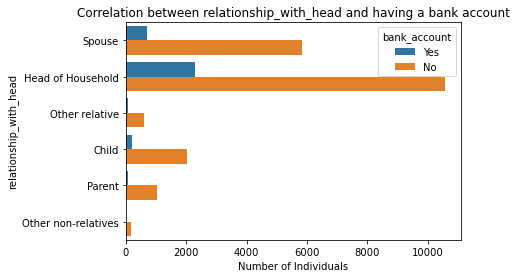

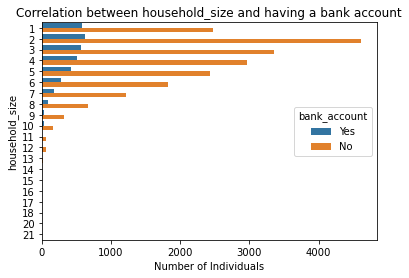

In [35]:
# to plot on y-axis for clear view 
dem_yvalue=['marital_status', 'education_level', 'job_type', 'relationship_with_head', 'household_size' ]

# plotting on y-axis
for col in dem_yvalue:
    sns.countplot(data= train, y= col, hue='bank_account')
    plt.title('Correlation between '+ col + ' and having a bank account')
    plt.ylabel(col)
    plt.xlabel('Number of Individuals')
    plt.show()
    print('\n');

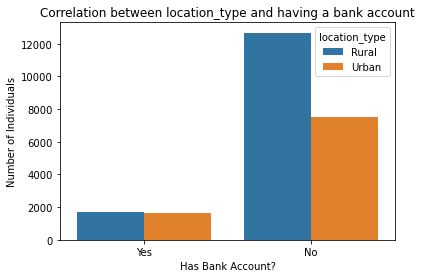

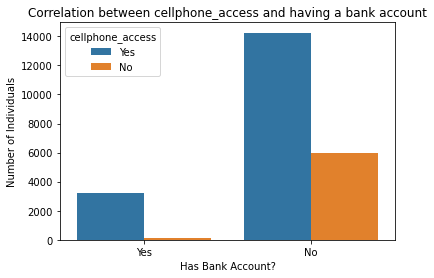

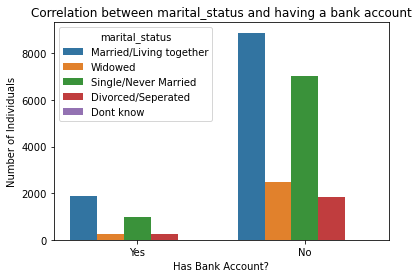

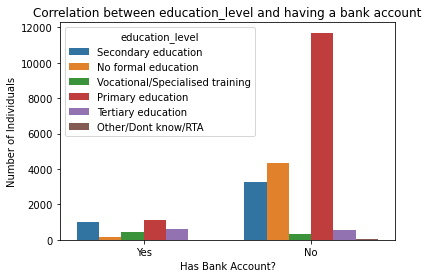

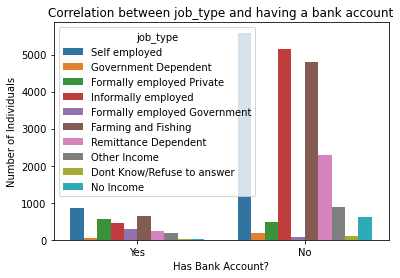

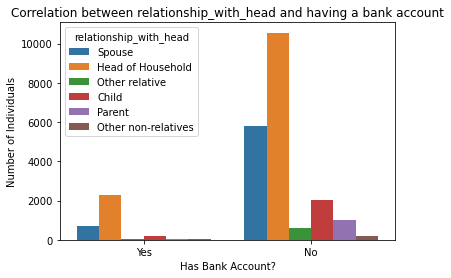

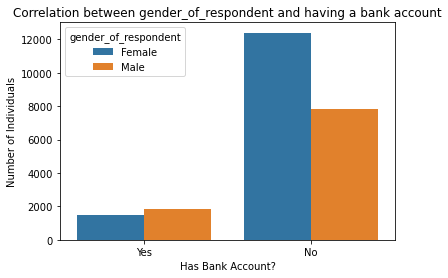

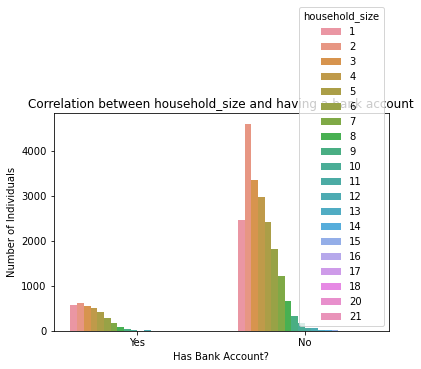

In [36]:
# gathering the required columns into an arrray
dem_value= ['location_type', 'cellphone_access','marital_status', 'education_level', 'job_type', 'relationship_with_head' , 
             'gender_of_respondent', 'household_size']

# plotting the charts for each of the demographic columns as hue
# with bank acount on x-axis and number of individuals on y-axis

for col in dem_value:
    sns.countplot(data= train, hue= col, x='bank_account')
    plt.title('Correlation between '+ col + ' and having a bank account')
    plt.xlabel('Has Bank Account?')
    plt.ylabel('Number of Individuals')
    plt.show()
    print('\n');

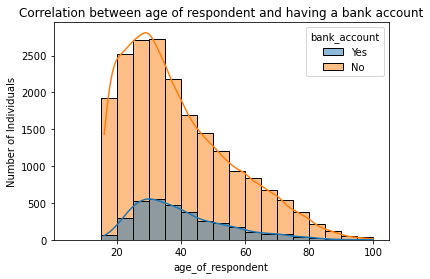

In [37]:
# checking distribution for age_of_respondent
#a histogram of age of respondent 
sns.histplot(data=train, x= 'age_of_respondent', binwidth= 5, binrange= (5,100), kde=True, hue='bank_account')
plt.title('Correlation between age of respondent and having a bank account')
plt.ylabel('Number of Individuals');

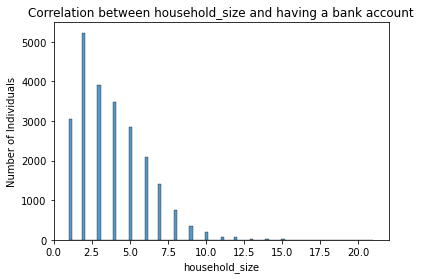

In [38]:
# checking distribution for household_size
#a histogram of household_size 
sns.histplot(data=train, x= 'household_size')
plt.title('Correlation between household_size and having a bank account')
plt.ylabel('Number of Individuals');

#### Q3. What is the percentage of individuals having other financial services like mobile money, insurance, etc. across different countries?
        The required qualifiers/columns to answer this question is not present in the dataset. 

#### Q4. Are there any outliers or anomalies in the data?
- boxplot to check outliers

<AxesSubplot:xlabel='age_of_respondent'>

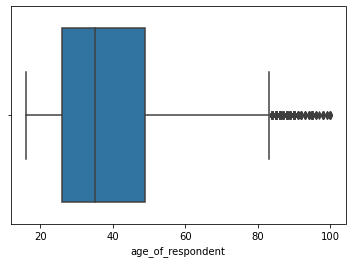

In [39]:
### checking outliers
sns.boxplot(data=train, x='age_of_respondent')

- ages above 82 are outliers

<AxesSubplot:xlabel='household_size'>

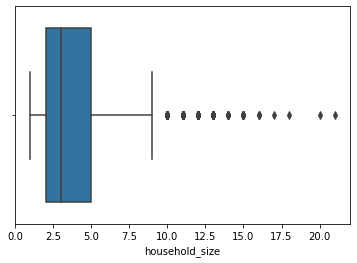

In [40]:
### checking outliers
sns.boxplot(data=train, x='household_size')

- with an average household size of about 3.
- A household size of 10 and above is abnormal

### Modelling

In [41]:
# importing libraries required
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [45]:
cat_features= train.select_dtypes(include=['O']).columns.to_list()

In [51]:
# turning all non-int columns to integer

le= LabelEncoder()
for col in cat_features:
    train[col]= le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])
    
# testing to check the change
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   country                 23524 non-null  int32
 1   year                    23524 non-null  int64
 2   uniqueid                23524 non-null  int32
 3   bank_account            23524 non-null  int32
 4   location_type           23524 non-null  int64
 5   cellphone_access        23524 non-null  int64
 6   household_size          23524 non-null  int64
 7   age_of_respondent       23524 non-null  int64
 8   gender_of_respondent    23524 non-null  int64
 9   relationship_with_head  23524 non-null  int64
 10  marital_status          23524 non-null  int64
 11  education_level         23524 non-null  int64
 12  job_type                23524 non-null  int64
dtypes: int32(3), int64(10)
memory usage: 2.1 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   country                 10086 non-null  int32
 1   year                    10086 non-null  int64
 2   uniqueid                10086 non-null  int32
 3   location_type           10086 non-null  int64
 4   cellphone_access        10086 non-null  int64
 5   household_size          10086 non-null  int64
 6   age_of_respondent       10086 non-null  int64
 7   gender_of_respondent    10086 non-null  int64
 8   relationship_with_head  10086 non-null  int64
 9   marital_status          10086 non-null  int64
 10  education_level         10086 non-null  int64
 11  job_type                10086 non-null  int64
dtypes: int32(2), int64(10)
memory usage: 866.9 KB


None

In [52]:
# selecting x and y
x= train.drop(['bank_account','uniqueid'], axis=1)
y= train.bank_account
display(x.columns)
display(y.head())

Index(['country', 'year', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int32

In [53]:
# creating the train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

#### Creating the models

In [64]:
#importing libraries required for model prediction
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix


In [59]:
# importing other models to test out 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



In [67]:
# calling the model function
log_reg= LogisticRegression()

#training/ fitting the model on the X_train, y_train data
log_reg.fit(X_train, y_train)

#making the prediction on part of the train data
lr_pred= log_reg.predict(X_test)

# printing the prediction

lr_pred

array([0, 0, 0, ..., 0, 0, 1])

In [68]:
# testing the accuracy of the model
accuracy_score(y_test, lr_pred)

0.8748140276301807

In [70]:
# calculating the accuracy and precision of the model
print(f"Accuracy :{ accuracy_score(lr_pred, y_test) * 100}")
print(f"Precision :{ precision_score(lr_pred, y_test) * 100}")


Accuracy :87.48140276301807
Precision :24.018126888217523


In [79]:
# checking the value counts of target variable in train data
train.bank_account.value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

In [80]:
# displaying the confusion matrix of the model
confusion_matrix(y_test, lr_pred)

array([[3957,   86],
       [ 503,  159]], dtype=int64)


### checking the correlation of the other columns to target variable

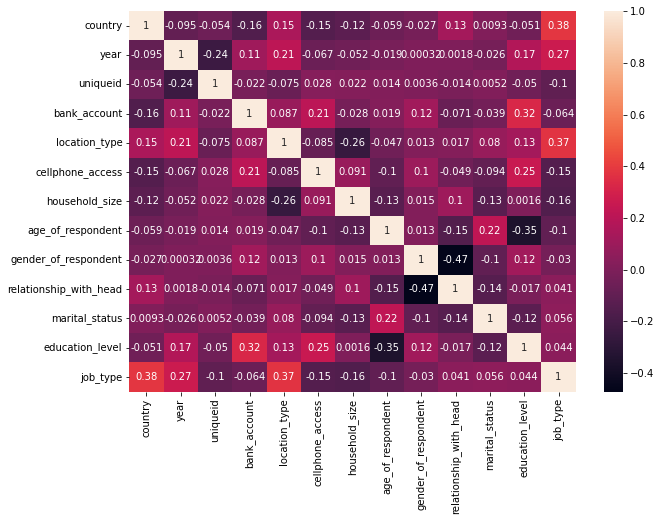

In [71]:
# visualizing correlation coefficients between the columns
corr = train.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr, annot = True);

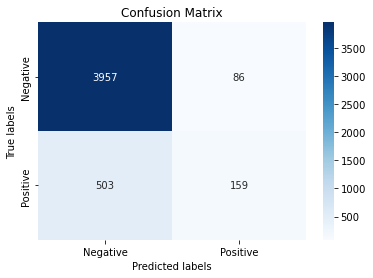

In [72]:
# building the confusion matrix visualisation 
cm = confusion_matrix(y_test, lr_pred)

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# Show plot
plt.show()

In [74]:
# Evaluating model's perfOrmance

from sklearn import metrics
from sklearn.metrics import classification_report
print("Accuracy: ",metrics.accuracy_score(y_test, lr_pred))
print("Recall: " ,metrics.recall_score(y_test, lr_pred, zero_division=1))
print("Precision: ",metrics.precision_score(y_test, lr_pred, zero_division=1))
print("CL Report: ",metrics.classification_report(y_test, lr_pred, zero_division=1))



Accuracy:  0.8748140276301807
Recall:  0.24018126888217523
Precision:  0.6489795918367347
CL Report:                precision    recall  f1-score   support

           0       0.89      0.98      0.93      4043
           1       0.65      0.24      0.35       662

    accuracy                           0.87      4705
   macro avg       0.77      0.61      0.64      4705
weighted avg       0.85      0.87      0.85      4705



### Creating my submission file



In [78]:
### viewing the sample submission file for the format to follow

sample.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [82]:
# reloading the test file to get my id column

test2= pd.read_csv('Test.csv')
test2.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [83]:
# creating the id column in the specified format
test["uniqueid"] = test2["uniqueid"] + " x " + test2["country"]

In [85]:
# loading and creating my prediction for the test file
test_prediction=log_reg.predict(test.drop(columns=['uniqueid'], axis=1))


In [86]:
# creating my target variable column with my model's prediction
test2["bank_account"] = test_prediction

In [87]:
# viewing the test2 table
test2.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,0
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,1
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,0
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,0
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,0


In [90]:
# isolating required fields and storing in csv file
test2[['uniqueid', 'bank_account']].to_csv("submission.csv", index=False)

### other models to test
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [92]:
# create functions for all the modelling to ease testing other models


### Conclusion

- present your findings